In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
pal = sns.color_palette(palette='icefire')
pal_energy      = pal[1]
pal_energy_best = pal[0]
pal_runtime     = pal[5]

In [3]:
optimum_pinned = {}
optimum = {}

best = pd.read_csv('data/find_best.csv')
for ((size, pin), group) in best.groupby(['size', 'pin']):
    best_energy = group['energy'].min()
    best_row = group[group['energy'].eq(best_energy)].iloc[0]
    threads = int(best_row['threads'])

    # Round to multiple of four, since there is some measurement variation
    threads = int((threads + 1) / 4) * 4
    
    if pin:
        optimum_pinned[int(size)] = threads
    else:
        optimum[int(size)] = threads

def find_best(row):
    opt = optimum_pinned if row['pin'] else optimum
    return opt[min(opt.keys(), key=lambda k: abs(row['size']-k))]

print('w/ pinning:', optimum_pinned)
print('w/o pinning:', optimum)

w/ pinning: {500: 16, 600: 16, 700: 16, 800: 16, 900: 16, 1000: 16, 1100: 12, 1200: 12, 1300: 12, 1400: 12, 1500: 12}
w/o pinning: {500: 16, 600: 16, 700: 16, 800: 16, 900: 16, 1000: 16, 1100: 8, 1200: 8, 1300: 8, 1400: 8, 1500: 8}


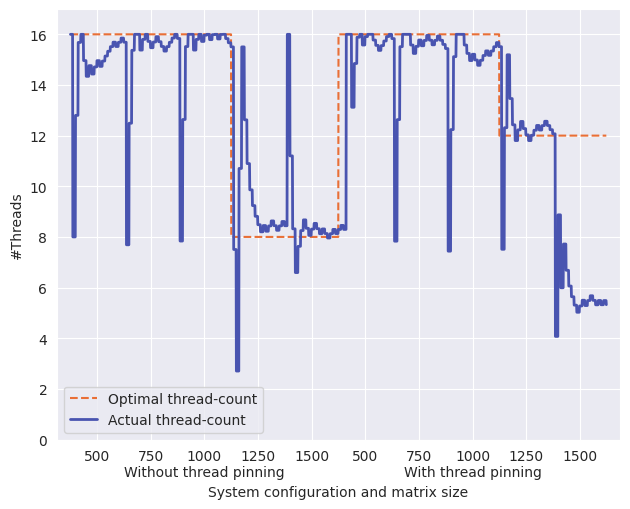

Average distance from optimum: 1.5135


In [4]:
fast = pd.read_csv('data/adapt_fast.csv')
fast['optimum'] = fast.apply(find_best, axis=1)

fig = plt.figure(figsize=(6.4, 5.2))

x = fast.index

ax = sns.lineplot(x=x, y=fast['optimum'], label='Optimal thread-count', color=pal_runtime, linestyle='--')
sns.lineplot(x=x, y=fast['threads'], label='Actual thread-count', color=pal_energy, linewidth=2, ax=ax)

xticks = list(range(100, len(fast), 200))
xlabels = [str(fast['size'][x]) for x in xticks]
xlabels[2] += '\nWithout thread pinning'
xlabels[7] += '\nWith thread pinning'
ax.set_xticks(xticks, labels=xlabels)

ax.set_xlabel('System configuration and matrix size')
ax.set_ylabel('#Threads')
ax.set_xlim((-50,len(fast)+50))
ax.set_ylim((0,17))

fig.tight_layout()
fig.savefig('images/adapt_fast.png', bbox_inches='tight')
plt.show()

dist = (round(fast['threads']) - fast['optimum']).abs()
print(f'Average distance from optimum: {dist.sum() / len(dist):.4f}')

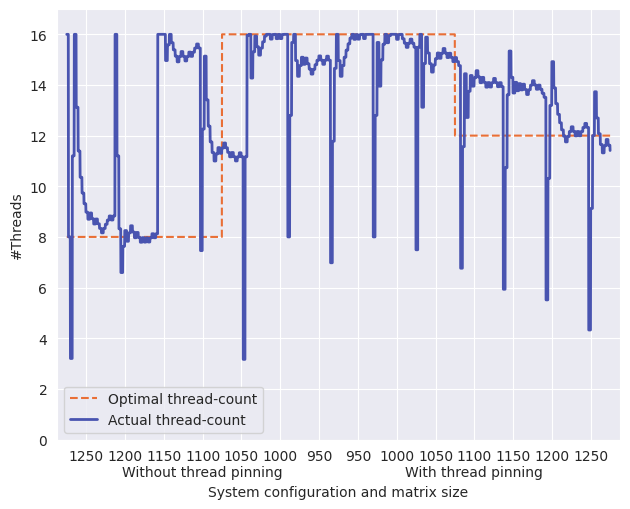

Average distance from optimum: 2.0254


In [5]:
slow = pd.read_csv('data/adapt_slow.csv')
slow['optimum'] = slow.apply(find_best, axis=1)

fig = plt.figure(figsize=(6.4, 5.2))

x = slow.index

ax = sns.lineplot(x=x, y=slow['optimum'], label='Optimal thread-count', color=pal_runtime, linestyle='--')
sns.lineplot(x=x, y=slow['threads'], label='Actual thread-count', color=pal_energy, linewidth=2, ax=ax)

xticks = list(range(100, len(slow), 200))
xlabels = [str(slow['size'][x]) for i, x in enumerate(xticks)]
xlabels[3] += '\nWithout thread pinning'
xlabels[10] += '\nWith thread pinning'
ax.set_xticks(xticks, labels=xlabels)

ax.set_xlabel('System configuration and matrix size')
ax.set_ylabel('#Threads')
ax.set_xlim((-50,len(slow)+50))
ax.set_ylim((0,17))

fig.tight_layout()
fig.savefig('images/adapt_slow.png', bbox_inches='tight')
plt.show()

dist = (round(slow['threads']) - slow['optimum']).abs()
print(f'Average distance from optimum: {dist.sum() / len(dist):.4f}')